In [68]:
import tensorflow
tensorflow.__version__

'1.4.0'

In [69]:
import keras
keras.__version__

'2.1.0'

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.utils import np_utils

np.random.seed(100)
%matplotlib inline

In [71]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [72]:
X_train.shape

(50000, 32, 32, 3)

In [73]:
y_train.shape

(50000, 1)

In [74]:
y_train = y_train.reshape(y_train.shape[0])  #y_train comes as a 2D nx1 matrix
y_test = y_test.reshape(y_test.shape[0])

In [75]:
y_train.shape

(50000,)

In [76]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [77]:
# Size of the batch
batch_size = 32
# Number of classes of images
nb_classes = 10
# Number of epochs for learning
num_epochs = 100
# Size of the images
img_rows, img_cols = 32, 32
# Number of channels in the image: RGB
img_channels = 3

In [78]:
# Normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [79]:
# Convert the labels to categories
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [80]:
y_train.shape

(50000, 10)

In [81]:
# Create a model
model = Sequential()

# The first convolutional layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
# The second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# The first pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization layer
model.add(Dropout(0.25))

# The third convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# The fourth convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
# The second pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization layer
model.add(Dropout(0.25))

# The fifth convolutional layer
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# The sixth convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
# The third pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization layer
model.add(Dropout(0.25))

# Flatten the dataset
model.add(Flatten())
# A fully-connected layer for classification
model.add(Dense(512, activation='relu'))
# Dropout regularization layer
model.add(Dropout(0.5))

# Output/Softmax layer
model.add(Dense(nb_classes, activation='softmax'))

In [82]:
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

## Augumenting the training data

In [83]:
from keras.preprocessing.image import ImageDataGenerator

print("Augment training set...")
datagen = ImageDataGenerator(
    rotation_range=80,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip = False,
    fill_mode='nearest')

Augment training set...


Number of images returned by iterator: 25
CPU times: user 916 ms, sys: 364 ms, total: 1.28 s
Wall time: 1.26 s


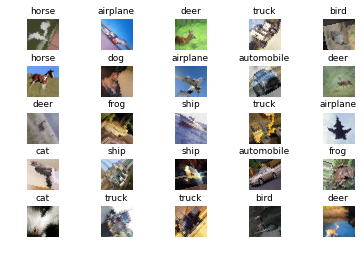

In [84]:
%%time
#fit the dataget
datagen.fit(X_train)

it = datagen.flow(X_train, y_train, batch_size=25)     # This is a Python iterator
images, categories = it.next()
print("Number of images returned by iterator:", len(images))
for i in range(25):
    plt.subplot(5, 5, i+1)
    im = images[i]
    c = np.where(categories[i] == 1)[0][0]             # convert one-hot to regular index
    plt.imshow(im, cmap='gnuplot2')
    plt.title(label_names[c], fontsize=9)
    plt.axis('off')
    plt.subplots_adjust(wspace=0.9, hspace=0.5)

In [85]:
%%time
# train
history = model.fit_generator(datagen.flow(X_train, y_train,
          batch_size=batch_size), samples_per_epoch=X_train.shape[0],
          epochs=num_epochs, validation_data = (X_test, y_test), verbose=2)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=100, validation_data=(array([[[..., verbose=2, steps_per_epoch=1562)`


Epoch 1/100
 - 30s - loss: 2.1909 - acc: 0.1668 - val_loss: 2.0331 - val_acc: 0.2447
Epoch 2/100
 - 29s - loss: 2.0271 - acc: 0.2392 - val_loss: 1.9262 - val_acc: 0.3217
Epoch 3/100
 - 29s - loss: 1.9335 - acc: 0.2837 - val_loss: 1.7917 - val_acc: 0.3603
Epoch 4/100
 - 29s - loss: 1.8571 - acc: 0.3214 - val_loss: 1.6986 - val_acc: 0.3976
Epoch 5/100
 - 29s - loss: 1.7999 - acc: 0.3420 - val_loss: 1.6340 - val_acc: 0.4108
Epoch 6/100
 - 30s - loss: 1.7544 - acc: 0.3610 - val_loss: 1.5930 - val_acc: 0.4314
Epoch 7/100
 - 29s - loss: 1.7076 - acc: 0.3781 - val_loss: 1.5252 - val_acc: 0.4449
Epoch 8/100
 - 29s - loss: 1.6669 - acc: 0.3944 - val_loss: 1.4828 - val_acc: 0.4771
Epoch 9/100
 - 29s - loss: 1.6267 - acc: 0.4110 - val_loss: 1.4423 - val_acc: 0.4808
Epoch 10/100
 - 29s - loss: 1.5972 - acc: 0.4235 - val_loss: 1.4366 - val_acc: 0.4873
Epoch 11/100
 - 29s - loss: 1.5621 - acc: 0.4373 - val_loss: 1.3853 - val_acc: 0.5060
Epoch 12/100
 - 29s - loss: 1.5331 - acc: 0.4463 - val_loss: 1.

Epoch 97/100
 - 30s - loss: 0.8598 - acc: 0.6991 - val_loss: 0.6850 - val_acc: 0.7592
Epoch 98/100
 - 30s - loss: 0.8621 - acc: 0.6985 - val_loss: 0.6849 - val_acc: 0.7609
Epoch 99/100
 - 30s - loss: 0.8586 - acc: 0.7013 - val_loss: 0.6764 - val_acc: 0.7608
Epoch 100/100
 - 30s - loss: 0.8558 - acc: 0.6992 - val_loss: 0.6685 - val_acc: 0.7688
CPU times: user 1h 25min 16s, sys: 3min 53s, total: 1h 29min 10s
Wall time: 49min 8s


In [86]:
model_json = model.to_json()
open('cifar10_architecture_sgd100_6L_aug.json', 'w').write(model_json)

# Save the weights learned by the deep neural network on the training data
model.save_weights('cifar10_weights_sgd100_6L_aug.h5')

In [87]:
%%time
scores = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=2)
#print("Test score:", score[0])
#print('Test accuracy:', score[1])
print("The accuracy of test data: %.2f%%" % (scores[1]*100))

The accuracy of test data: 76.88%
CPU times: user 1.22 s, sys: 80 ms, total: 1.3 s
Wall time: 1.61 s


In [88]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
__________

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<IPython.core.display.Javascript object>


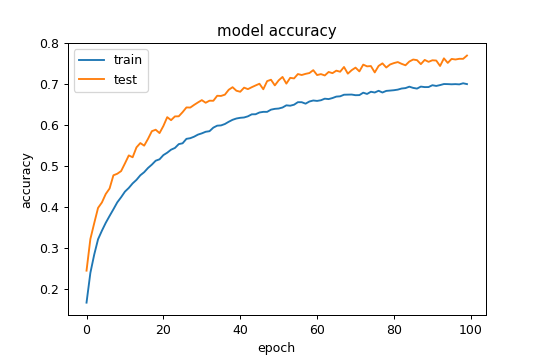

In [91]:
%matplotlib notebook
%matplotlib notebook

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


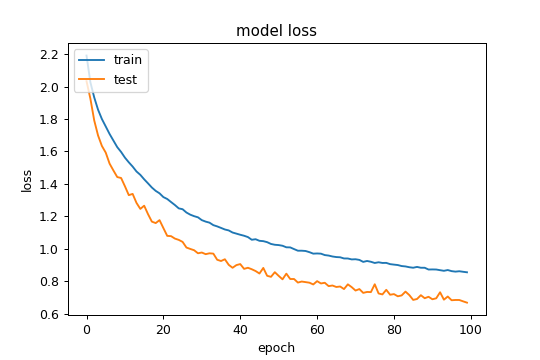

In [92]:
%matplotlib notebook
%matplotlib notebook

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(X_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
conf_mx = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
conf_mx

array([[770,  23,  40,  17,   7,   1,   5,  18,  69,  50],
       [  1, 921,   1,   3,   0,   0,   4,   3,  13,  54],
       [ 54,   7, 675,  40,  69,  30,  85,  19,  10,  11],
       [ 15,   9,  55, 632,  31, 115,  85,  24,  14,  20],
       [ 18,   2,  86,  50, 679,  20,  78,  59,   5,   3],
       [ 10,   9,  52, 142,  28, 683,  26,  34,   7,   9],
       [  5,   7,  21,  44,  24,  17, 857,   7,   8,  10],
       [ 14,   4,  49,  35,  41,  48,  12, 777,   5,  15],
       [ 32,  31,  15,  13,   3,   4,   4,   3, 868,  27],
       [ 17, 111,   6,  12,   0,   3,   7,   3,  15, 826]])

In [96]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from keras.preprocessing.image import load_img, img_to_array
from keras.models import model_from_json

%matplotlib inline

# Scratch Model
weights_path = 'cifar10_weights_sgd100_6L_aug.h5'
model_path = 'cifar10_architecture_sgd100_6L_aug.json'

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [97]:
import scipy

def preprocess_image(image_path, preprocess_input, resize_shape):
    img = load_img(image_path)
    img = img_to_array(img)
    img = scipy.misc.imresize(img, size=resize_shape)
    img = preprocess_input(img)
    return img

In [98]:
with open(model_path, 'r') as model_json:
    loaded_model = model_from_json(model_json.read())

loaded_model.load_weights(weights_path)
print("Scratch Model Loaded")

Scratch Model Loaded


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'airplane')

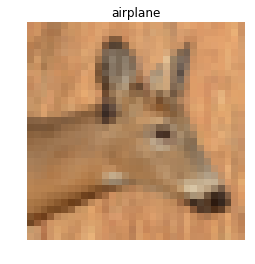

In [99]:
img = preprocess_image('images/deer.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'deer')

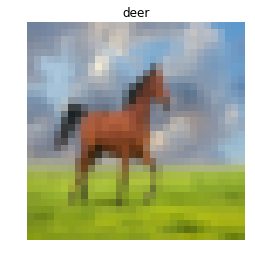

In [100]:
img = preprocess_image('images/horse.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'dog')

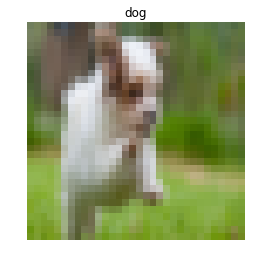

In [101]:
img = preprocess_image('images/dog.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'cat')

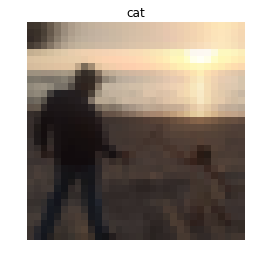

In [102]:
img = preprocess_image('images/dinesh.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'bird')

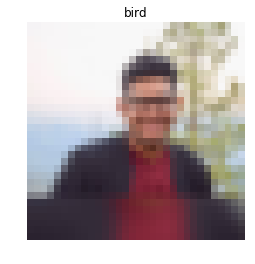

In [103]:
img = preprocess_image('images/hari.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'automobile')

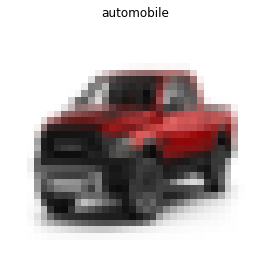

In [104]:
img = preprocess_image('images/car.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'truck')

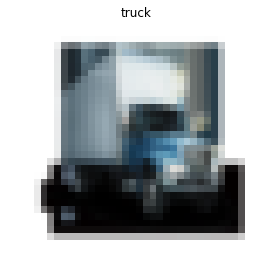

In [105]:
img = preprocess_image('images/truck.png', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

## References
https://github.com/JacobPolloreno/cifar10_keras<br>
Deep Learning with Keras by Antonio Gulli and Sujit Pal<br>
http://www.samyzaf.com/ML/cifar10/cifar10.html<br>
https://github.com/charlesgreen/keras_cifar10_cnn/blob/master/keras_cifar10_cnn/cifar10_cnn.py<br>
https://machinelearningmastery.com/image-augmentation-deep-learning-keras/<br>
https://www.kernix.com/blog/a-toy-convolutional-neural-network-for-image-classification-with-keras_p14